### Conclusion
For the data classification we have used the machine learning models named below:    
1. LogisticRegression    
2. KFold Cros Validation based on LogisticRegression and DecisionTreeClassifier    
3. DecisionTreeClassifier    
4. SVC    
5. RandomForestClassifier   
6. GridSearchCV based on RandomForestClassifier    
7. StackingClassifier    
8. Sequential (Accuracy=0.67, Specificity=0.51), it is too much hard working model for this small data.

All the aforementioned models demonstrated similar results. The main issue that all the models face is the low level of Specificity index. Which indicates that the models are not very good in predicting the negative results for loans, in data word the "no"-s or "0"-s. In that case that can be the result of very little data that has the answer "no", thus the models have hard times to learn some patterns to predict them.

In the assessment of the best model for classification we took into account several factors:    
1. The level of complication which in turn affect the speed of the model.    
2. The resulting classification model assessment parameters - Sensitivity, Specificity,Accuracy, Precision    
3. The usage of train, test separation of the data, given that the data was very little and we may get better or worse results just by luck

Finally, we chose 2 models to be the best for our problem with the given data, and those are the RandomForestClassifier clasifier and the LogisticRegression with KFold Cros Validation.


In [177]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import KFold # import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [178]:
data_train = data = pd.read_csv('./archive/train_u6lujuX_CVtuZ9i.csv')
# data.LoanAmount = data.LoanAmount.fillna(0)
# data.Self_Employed = data.Self_Employed.fillna('No')
le = preprocessing.LabelEncoder()
data.Loan_Status = le.fit_transform(data.Loan_Status)
data.Gender = le.fit_transform(data.Gender)
data.Married = le.fit_transform(data.Married)
data.Self_Employed = le.fit_transform(data.Self_Employed)
data = data.drop(['Loan_ID'], axis = 1)
data = pd.get_dummies (data)
# data = data.drop(['Education_Not Graduate', 'Dependents_3+', 'Gender'], axis = 1)
data = data.fillna(method ='bfill')

In [179]:
data

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,1,0,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,1,0,0
2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,0,0,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,1,0,0,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,1,0,1,0,0
610,1,1,0,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,1,0,1,0,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,1,0,0,0,1
612,1,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,1,0,0,0,1


In [180]:
y = data['Loan_Status']
data = data.drop(['Loan_Status'], axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(data, y, test_size=0.2, random_state=42)
norm = StandardScaler().fit(x_train)

X_train = norm.transform(x_train)
X_test = norm.transform(x_test)


In [181]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==1 and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==0 and y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return TP, FP, TN, FN

def print_metrics(tp, fp, tn, fn):
    Sensitivity = tp/(tp+fn)
    print('Sensitivity: %.2f'% Sensitivity)
    Specificity = tn/(tn+fp)
    print('Specificity: %.2f'% Specificity)
    Accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy: %.2f'% Accuracy)
    Precision = tp/(tp+fp)
    print('Precision: %.2f'% Precision)
    pass

### LogisticRegression

78 25 18 2
Sensitivity: 0.97
Specificity: 0.42
Accuracy: 0.78
Precision: 0.76


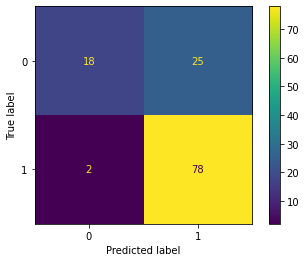

In [182]:
log = LogisticRegression(C=1, random_state=0).fit(x_train, y_train)
y_log = log.predict(x_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_log)
print(tp, fp, tn, fn)
print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(log, x_test, y_test)

### KFold for LogisticRegression

In [183]:
cv = KFold(n_splits=5)
log = LogisticRegression(C=0.1, random_state=0)
y_pred = cross_val_predict(log, X_train, y_train, cv=cv)
tp, fp, tn, fn = perf_measure(list(y_train), y_pred)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
scores = cross_val_score(log, x_train, y_train, cv=cv)

329 84 65 13
Sensitivity: 0.96
Specificity: 0.44
Accuracy: 0.80
Precision: 0.80


In [184]:
def my_cross_val_predict(model, x, y, cv):
    lm = model
    predictions = np.array([])
    x = np.array(x)
    y = np.array(y)
    kf = KFold(n_splits=cv)
    coef = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = lm.fit(x_train, y_train)
        predictions = np.append(predictions, lm.predict(x_test))
        coef.append(model.coef_)    
    
    new_coef = sum(coef)
    finel_coef =[i/cv for i in new_coef] 
    return predictions, finel_coef

def finel_model(coef, x):
    return np.array([sum(coef*i) for i in x])

In [185]:
log = LogisticRegression(C=1, random_state=0)
log_predict, coef = my_cross_val_predict(log, X_train, y_train, 10)
print(coef)

[array([-0.08521078,  0.37255502,  0.05426903,  0.01811544, -0.16145293,
       -0.22227419,  0.00966604,  1.16107776,  0.19640516, -0.03129605,
        0.29920906,  0.21042345,  0.06361746, -0.06361746, -0.1916083 ,
        0.24572659, -0.07074922])]


### DecisionTreeClassifier


72 20 23 8
Sensitivity: 0.90
Specificity: 0.53
Accuracy: 0.77
Precision: 0.78


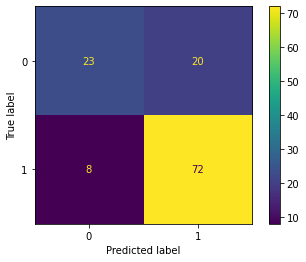

In [186]:
btree = DecisionTreeClassifier(min_samples_leaf =10, max_depth= 20)
btree.fit(X_train, y_train)
y_btree = btree.predict(X_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_btree)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(btree, X_test, y_test)
# DecisionTreeClassifier?

### KFold for DecisionTreeClassifier

In [187]:
btree = DecisionTreeClassifier(min_samples_leaf =15, max_depth= 20)
cv = KFold(n_splits=5)
y_pred = cross_val_predict(btree, data, y, cv=cv)
tp, fp, tn, fn = perf_measure(list(y), y_pred)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
# scores = cross_val_score(log, x_train, y_train, cv=cv)

380 102 90 42
Sensitivity: 0.90
Specificity: 0.47
Accuracy: 0.77
Precision: 0.79


### SVM

80 24 19 0
Sensitivity: 1.00
Specificity: 0.44
Accuracy: 0.80
Precision: 0.77


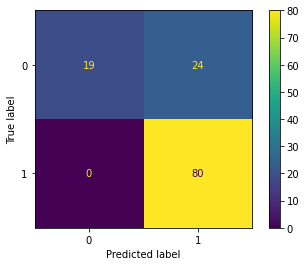

In [189]:
lsvm = svm.SVC(kernel='rbf', C =1, random_state=0)
lsvm.fit(X_train, y_train)
y_lsvm = lsvm.predict(X_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_lsvm)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(lsvm, X_test, y_test)


79 24 19 1
Sensitivity: 0.99
Specificity: 0.44
Accuracy: 0.80
Precision: 0.77


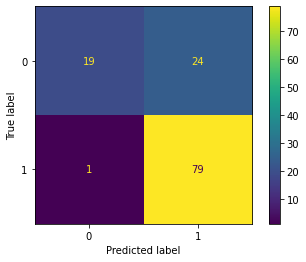

In [190]:
rf=RandomForestClassifier(n_estimators=10, max_depth= 5, min_samples_leaf = 10, random_state=0)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_rf)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(rf, X_test, y_test)


### GridSearchCV for RandomForestClassifier

79 24 19 1
Sensitivity: 0.99
Specificity: 0.44
Accuracy: 0.80
Precision: 0.77


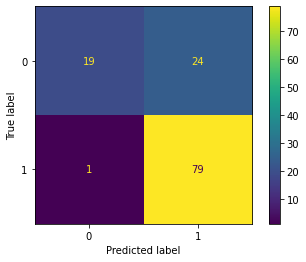

In [166]:
rtree = RandomForestClassifier(n_estimators=50, min_samples_leaf =15, max_depth= 10, random_state=0)
grid_search = GridSearchCV(rtree, param_grid, cv=10)
grid_search.fit(X_train,y_train)
y_rf=grid_search.predict(X_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_rf)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(grid_search, X_test, y_test)


### StackingClassifier


79 24 19 1
Sensitivity: 0.99
Specificity: 0.44
Accuracy: 0.80
Precision: 0.77


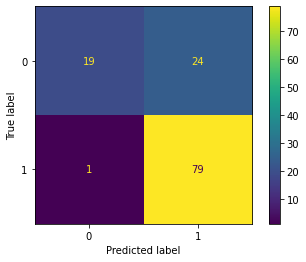

In [191]:
estimators = [
    ('btree', btree), 
    ('rf', rf),
    ('log', log),
    ('lr', make_pipeline(SVC(random_state=42)))
]
clf = StackingClassifier(estimators=estimators, final_estimator=make_pipeline(SVC(random_state=42)))
clf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
tp, fp, tn, fn = perf_measure(list(y_test), y_rf)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)
plot_confusion_matrix(clf, X_test, y_test)

In [192]:
data = pd.read_csv('./archive/train_u6lujuX_CVtuZ9i.csv')
data = data.drop(['Loan_ID'], axis = 1)
y= data.iloc[:,11:12].values
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
data = data.drop(['Loan_Status'], axis = 1)
# data.LoanAmount = data.LoanAmount.fillna(0)
# data.Self_Employed = data.Self_Employed.fillna('No')
le = preprocessing.LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.Married = le.fit_transform(data.Married)
data.Self_Employed = le.fit_transform(data.Self_Employed)
data = pd.get_dummies (data)
data = data.fillna(method ='bfill')
sc = StandardScaler()
x = sc.fit_transform(data)


In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

### Sequential

In [204]:
model = Sequential()
model.add(Dense(8, input_dim=17, activation = "relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 0.9370 - accuracy: 0.3880 - val_loss: 0.9060 - val_accuracy: 0.3902
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9017 - accuracy: 0.4148 - val_loss: 0.8590 - val_accuracy: 0.4309
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.4184 - val_loss: 0.8183 - val_accuracy: 0.4390
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8342 - accuracy: 0.4563 - val_loss: 0.7838 - val_accuracy: 0.4797
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7912 - accuracy: 0.5372 - val_loss: 0.7565 - val_accuracy: 0.4959
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7428 - accuracy: 0.5900 - val_loss: 0.7344 - val_accuracy: 0.5203
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7226 - accuracy: 0.5646 - val_loss: 0.7160 - val_accuracy: 0.5528
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.5046 - accuracy: 0.7590 - val_loss: 0.5538 - val_accuracy: 0.7724
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5094 - accuracy: 0.7626 - val_loss: 0.5517 - val_accuracy: 0.7805
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.7791 - val_loss: 0.5501 - val_accuracy: 0.7805
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 0.7716 - val_loss: 0.5486 - val_accuracy: 0.7805
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7966 - val_loss: 0.5470 - val_accuracy: 0.7805
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7787 - val_loss: 0.5457 - val_accuracy: 0.7805
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.7835 - val_loss: 0.5448 - val_accuracy: 0.7805
Epoch 66/100
8/8 [===============

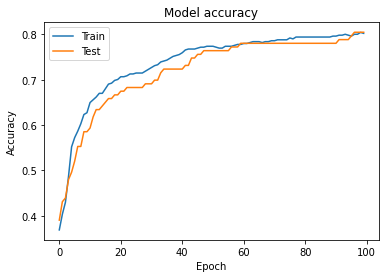

In [206]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

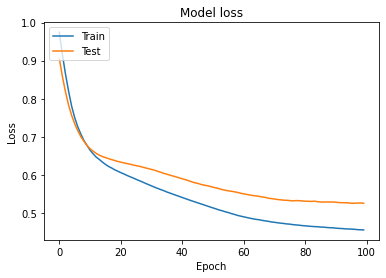

In [207]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [208]:
y_rf=model.predict(X_test)
a = []
y_rf = pd.DataFrame(y_rf)
for i in y_rf[1][:]:
    if i > 0.7:
        a.append(1)
    else:
        a.append(0)

a = np.array(a)
y_test = pd.DataFrame(y_test)
tp, fp, tn, fn = perf_measure(list(y_test[1][:]), a)
print(tp, fp, tn, fn)
a = print_metrics(tp, fp, tn, fn)


66 22 21 14
Sensitivity: 0.82
Specificity: 0.49
Accuracy: 0.71
Precision: 0.75
